In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


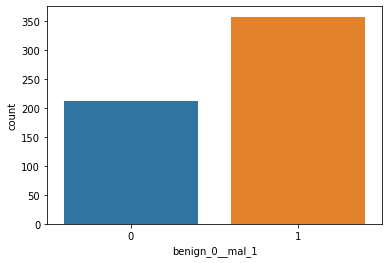

In [5]:
sns.countplot(x='benign_0__mal_1',data=df)

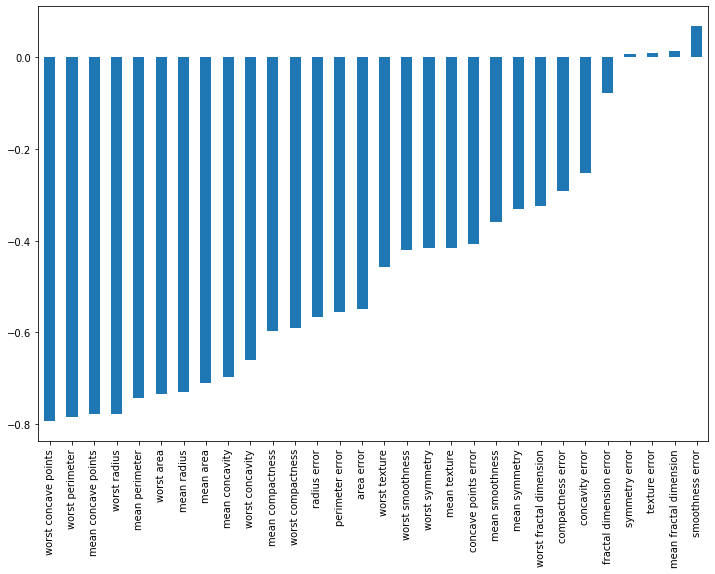

In [6]:
plt.figure(figsize=(12,8))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

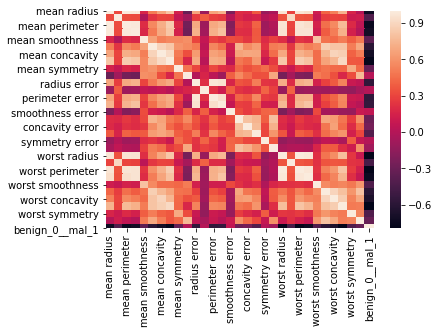

In [7]:
sns.heatmap(df.corr())

In [8]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=101)

In [11]:
from sklearn.preprocessing import MinMaxScaler


In [12]:
scaler=MinMaxScaler()


In [13]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [15]:
X_train.shape

(426, 30)

In [16]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))


In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [18]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 6ms/sample - loss: 0.7051 - val_loss: 0.6894
Epoch 2/600
426/426 [==============================] - 0s 170us/sample - loss: 0.6743 - val_loss: 0.6637
Epoch 3/600
426/426 [==============================] - 0s 130us/sample - loss: 0.6475 - val_loss: 0.6377
Epoch 4/600
426/426 [==============================] - 0s 131us/sample - loss: 0.6198 - val_loss: 0.6065
Epoch 5/600
426/426 [==============================] - 0s 128us/sample - loss: 0.5895 - val_loss: 0.5740
Epoch 6/600
426/426 [==============================] - 0s 120us/sample - loss: 0.5546 - val_loss: 0.5337
Epoch 7/600
426/426 [==============================] - 0s 121us/sample - loss: 0.5122 - val_loss: 0.4849
Epoch 8/600
426/426 [==============================] - 0s 119us/sample - loss: 0.4637 - val_loss: 0.4344
Epoch 9/600
426/426 [==============================] - 0s 110us/sample - loss: 0.4155 - val_loss: 0.3853
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0515 - val_loss: 0.1017
Epoch 79/600
426/426 [==============================] - 0s 104us/sample - loss: 0.0521 - val_loss: 0.0989
Epoch 80/600
426/426 [==============================] - 0s 123us/sample - loss: 0.0521 - val_loss: 0.0973
Epoch 81/600
426/426 [==============================] - 0s 114us/sample - loss: 0.0523 - val_loss: 0.0991
Epoch 82/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0513 - val_loss: 0.1049
Epoch 83/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0508 - val_loss: 0.0996
Epoch 84/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0506 - val_loss: 0.1061
Epoch 85/600
426/426 [==============================] - 0s 107us/sample - loss: 0.0475 - val_loss: 0.0989
Epoch 86/600
426/426 [==============================] - 0s 95us/sample - loss: 0.0487 - val_loss: 0.1116
Epoch 87/600
426/426 [=========================

Epoch 155/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0392 - val_loss: 0.1110
Epoch 156/600
426/426 [==============================] - 0s 111us/sample - loss: 0.0400 - val_loss: 0.1171
Epoch 157/600
426/426 [==============================] - 0s 111us/sample - loss: 0.0396 - val_loss: 0.1154
Epoch 158/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0365 - val_loss: 0.1141
Epoch 159/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0368 - val_loss: 0.1144
Epoch 160/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0365 - val_loss: 0.1136
Epoch 161/600
426/426 [==============================] - 0s 107us/sample - loss: 0.0424 - val_loss: 0.1140
Epoch 162/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0455 - val_loss: 0.1127
Epoch 163/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0469 - val_loss: 0.1269
Epoch 164/600
426/426 [================

426/426 [==============================] - 0s 105us/sample - loss: 0.0296 - val_loss: 0.1292
Epoch 232/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0303 - val_loss: 0.1306
Epoch 233/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0288 - val_loss: 0.1261
Epoch 234/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0302 - val_loss: 0.1321
Epoch 235/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0317 - val_loss: 0.1297
Epoch 236/600
426/426 [==============================] - 0s 107us/sample - loss: 0.0330 - val_loss: 0.1381
Epoch 237/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0334 - val_loss: 0.1281
Epoch 238/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0284 - val_loss: 0.1247
Epoch 239/600
426/426 [==============================] - 0s 104us/sample - loss: 0.0298 - val_loss: 0.1210
Epoch 240/600
426/426 [============================

Epoch 308/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0224 - val_loss: 0.1446
Epoch 309/600
426/426 [==============================] - 0s 111us/sample - loss: 0.0224 - val_loss: 0.1372
Epoch 310/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0223 - val_loss: 0.1397
Epoch 311/600
426/426 [==============================] - 0s 97us/sample - loss: 0.0221 - val_loss: 0.1371
Epoch 312/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0247 - val_loss: 0.1480
Epoch 313/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0235 - val_loss: 0.1490
Epoch 314/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0219 - val_loss: 0.1456
Epoch 315/600
426/426 [==============================] - 0s 128us/sample - loss: 0.0218 - val_loss: 0.1478
Epoch 316/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0226 - val_loss: 0.1389
Epoch 317/600
426/426 [================

426/426 [==============================] - 0s 99us/sample - loss: 0.0246 - val_loss: 0.2005
Epoch 385/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0203 - val_loss: 0.1456
Epoch 386/600
426/426 [==============================] - 0s 104us/sample - loss: 0.0206 - val_loss: 0.1743
Epoch 387/600
426/426 [==============================] - 0s 92us/sample - loss: 0.0250 - val_loss: 0.1492
Epoch 388/600
426/426 [==============================] - 0s 109us/sample - loss: 0.0164 - val_loss: 0.1606
Epoch 389/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0159 - val_loss: 0.1519
Epoch 390/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0151 - val_loss: 0.1549
Epoch 391/600
426/426 [==============================] - 0s 109us/sample - loss: 0.0153 - val_loss: 0.1518
Epoch 392/600
426/426 [==============================] - 0s 114us/sample - loss: 0.0174 - val_loss: 0.1598
Epoch 393/600
426/426 [==============================]

Epoch 461/600
426/426 [==============================] - 0s 102us/sample - loss: 0.0122 - val_loss: 0.1714
Epoch 462/600
426/426 [==============================] - 0s 109us/sample - loss: 0.0108 - val_loss: 0.1763
Epoch 463/600
426/426 [==============================] - 0s 97us/sample - loss: 0.0108 - val_loss: 0.1605
Epoch 464/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0110 - val_loss: 0.1813
Epoch 465/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0101 - val_loss: 0.1695
Epoch 466/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0103 - val_loss: 0.1705
Epoch 467/600
426/426 [==============================] - 0s 111us/sample - loss: 0.0100 - val_loss: 0.1700
Epoch 468/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0105 - val_loss: 0.1714
Epoch 469/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0099 - val_loss: 0.1803
Epoch 470/600
426/426 [===============

426/426 [==============================] - 0s 122us/sample - loss: 0.0060 - val_loss: 0.2068
Epoch 538/600
426/426 [==============================] - 0s 114us/sample - loss: 0.0068 - val_loss: 0.2190
Epoch 539/600
426/426 [==============================] - 0s 114us/sample - loss: 0.0075 - val_loss: 0.1961
Epoch 540/600
426/426 [==============================] - 0s 107us/sample - loss: 0.0061 - val_loss: 0.2218
Epoch 541/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0068 - val_loss: 0.1937
Epoch 542/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0073 - val_loss: 0.2075
Epoch 543/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0061 - val_loss: 0.2170
Epoch 544/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0064 - val_loss: 0.1968
Epoch 545/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0088 - val_loss: 0.2108
Epoch 546/600
426/426 [============================

In [19]:
losses=pd.DataFrame(model.history.history)

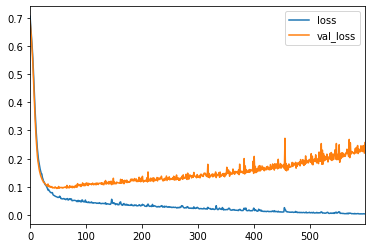

In [20]:
losses.plot()

# model is overfitting

# lets get rid of overfitting using callbacks or early stopping

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
model2=Sequential()
model2.add(Dense(30,activation='relu'))
model2.add(Dense(15,activation='relu'))

model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam')

In [23]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)  # minimise va;_loss

In [24]:
model2.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6681 - val_loss: 0.6526
Epoch 2/600
426/426 [==============================] - 0s 102us/sample - loss: 0.6475 - val_loss: 0.6321
Epoch 3/600
426/426 [==============================] - 0s 123us/sample - loss: 0.6227 - val_loss: 0.6023
Epoch 4/600
426/426 [==============================] - 0s 127us/sample - loss: 0.5887 - val_loss: 0.5663
Epoch 5/600
426/426 [==============================] - 0s 151us/sample - loss: 0.5483 - val_loss: 0.5216
Epoch 6/600
426/426 [==============================] - 0s 121us/sample - loss: 0.4994 - val_loss: 0.4711
Epoch 7/600
426/426 [==============================] - 0s 156us/sample - loss: 0.4479 - val_loss: 0.4152
Epoch 8/600
426/426 [==============================] - 0s 132us/sample - loss: 0.3927 - val_loss: 0.3571
Epoch 9/600
426/426 [==============================] - 0s 123us/sample - loss: 0.3405 - val_loss: 0.3079
Epoch 10/60

In [25]:
losses=pd.DataFrame(model2.history.history)

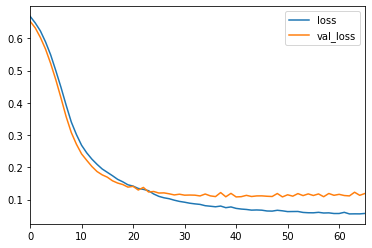

In [26]:
losses.plot()

# Using Dropout

In [27]:
model3=Sequential()
model3.add(Dense(30,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(15,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1,activation='sigmoid'))
model3.compile(loss='binary_crossentropy',optimizer='adam')

In [28]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)  # minimise va;_loss

In [29]:
model3.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.7035 - val_loss: 0.6762
Epoch 2/600
426/426 [==============================] - 0s 109us/sample - loss: 0.6868 - val_loss: 0.6620
Epoch 3/600
426/426 [==============================] - 0s 127us/sample - loss: 0.6676 - val_loss: 0.6458
Epoch 4/600
426/426 [==============================] - 0s 116us/sample - loss: 0.6567 - val_loss: 0.6317
Epoch 5/600
426/426 [==============================] - 0s 132us/sample - loss: 0.6453 - val_loss: 0.6186
Epoch 6/600
426/426 [==============================] - 0s 131us/sample - loss: 0.6221 - val_loss: 0.6020
Epoch 7/600
426/426 [==============================] - 0s 114us/sample - loss: 0.6095 - val_loss: 0.5764
Epoch 8/600
426/426 [==============================] - 0s 116us/sample - loss: 0.5835 - val_loss: 0.5490
Epoch 9/600
426/426 [==============================] - 0s 127us/sample - loss: 0.5645 - val_loss: 0.5158
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0980 - val_loss: 0.1017
Epoch 79/600
426/426 [==============================] - 0s 98us/sample - loss: 0.1074 - val_loss: 0.0971
Epoch 80/600
426/426 [==============================] - 0s 114us/sample - loss: 0.1126 - val_loss: 0.0951
Epoch 81/600
426/426 [==============================] - 0s 97us/sample - loss: 0.1079 - val_loss: 0.0930
Epoch 82/600
426/426 [==============================] - 0s 98us/sample - loss: 0.1310 - val_loss: 0.0935
Epoch 83/600
426/426 [==============================] - 0s 113us/sample - loss: 0.1249 - val_loss: 0.0997
Epoch 84/600
426/426 [==============================] - 0s 112us/sample - loss: 0.1287 - val_loss: 0.0893
Epoch 85/600
426/426 [==============================] - 0s 107us/sample - loss: 0.1251 - val_loss: 0.0870
Epoch 86/600
426/426 [==============================] - 0s 119us/sample - loss: 0.1099 - val_loss: 0.0936
Epoch 87/600
426/426 [===========================

In [30]:
losses=pd.DataFrame(model3.history.history)

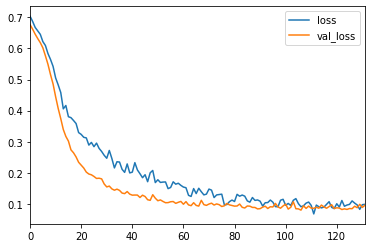

In [31]:
losses.plot()

In [32]:
predictions=model3.predict_classes(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [35]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 4 84]]
